In [46]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("train_labels.csv")
df
len(df)

156

Image name: 4.jpg
Label: 1


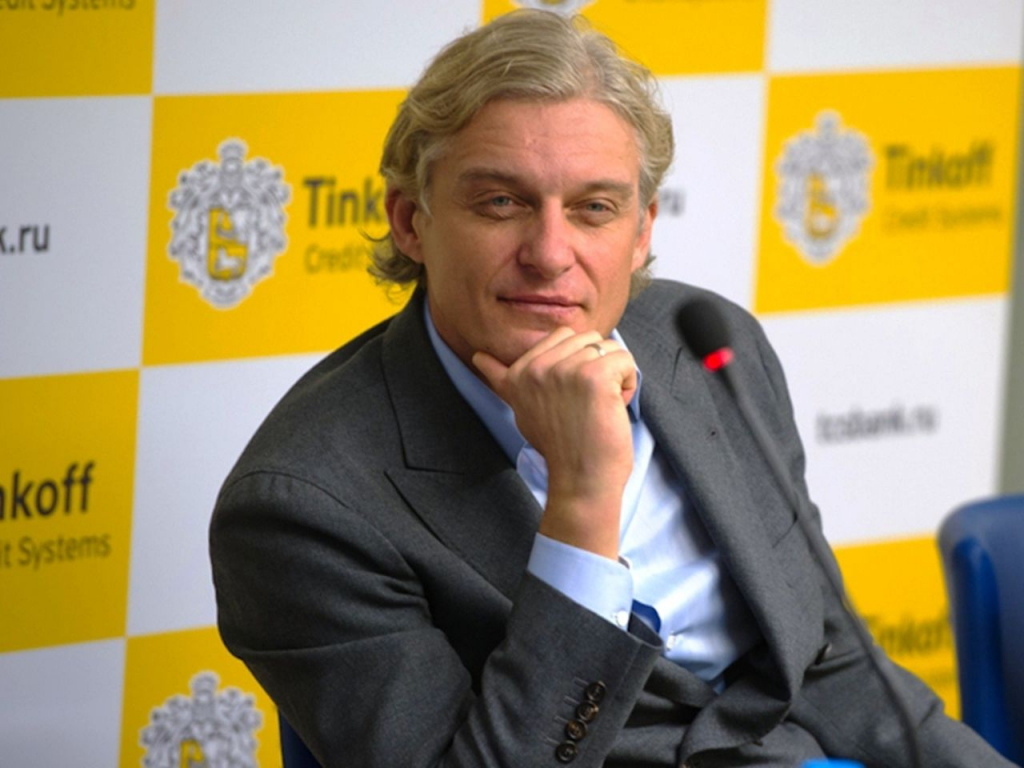

In [26]:
n = 4
img_name = df.iloc[n, 0]
label = df.iloc[n, 1 ]
print('Image name: {}'.format(img_name))
print('Label: {}'.format(label))
Image.open("train/train/"+ img_name)

In [36]:
class OlegDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.csv = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.csv)
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name = os.path.join(self.root_dir, 
                               self.csv.iloc[idx, 0])
        image = Image.open(img_name)
        sample = {'image': image, 'label': self.csv.iloc[idx, 1]}
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [37]:
oleg_dataset = OlegDataset(csv_file = "train_labels.csv", root_dir="train/train/")

0 (800, 533) 0
1 (1180, 730) 0
2 (600, 400) 1
3 (1920, 1080) 0


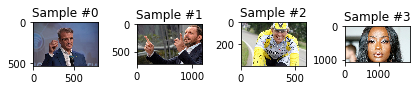

In [48]:

fig = plt.figure()
for i  in range(len(oleg_dataset)):
    sample = oleg_dataset[i]
    print(i,sample['image'].size, sample['label'])
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    plt.imshow(sample['image'])
    
    if i == 3:
        plt.show()
        break

In [41]:
sample = oleg_dataset[2]

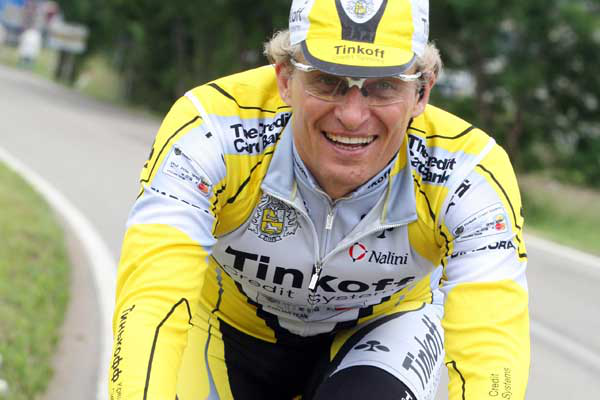

In [43]:
sample['image']